In [213]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display
from collections import OrderedDict
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import glob
import ipyparallel as ipp
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import MESS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get all the empirical classifiers and regressors

In [75]:
## Directory where the empirical results live
emp_base_dir = "/home/iovercast/Continuosity/MESS/jupyter-notebooks/empirical/"
snail_dir = emp_base_dir + "Galapagos_snails/"
spider_dir = emp_base_dir + "Reunion_spider/"
weevil_dir = emp_base_dir + "Mascarene_weevils/"
trees_dir = emp_base_dir + "Australian_trees/"

emp_plot_order = ["Mauritius_weevils",
                    "Reunion_weevils",
                    "Reunion_spiders",
                    "Dorrigo_trees",
                    "Nightcap_trees",
                    "Washpool_trees",
                    "Isabela_snails",
                    "San_Cristobal_snails",
                    "Santa_Cruz_snails"]

emp_dirs = {"Mauritius_weevils":weevil_dir + "Mauritius/",
            "Reunion_weevils":weevil_dir + "Reunion/",
            "Reunion_spiders":spider_dir + "Reunion/",
            "Dorrigo_trees":trees_dir + "Dorrigo/",
            "Nightcap_trees":trees_dir + "Nightcap/",
            "Washpool_trees":trees_dir + "Washpool/",
            "Isabela_snails":snail_dir + "Isabela/",
            "San_Cristobal_snails":snail_dir + "San_Cristobal/",
            "Santa_Cruz_snails":snail_dir + "Santa_Cruz/"}

classifiers = {x:emp_dirs[x] + x.rsplit("_", 1)[0] + "_classifier.mdl" for x in emp_dirs}
regressors = {x:emp_dirs[x] + x.rsplit("_", 1)[0] + "_regressor.mdl" for x in emp_dirs}
emp_df = pd.DataFrame(emp_dirs.values(), index=emp_dirs.keys(), columns=["root_dir"])
emp_df["classifiers"] = pd.Series(classifiers)
emp_df["regressors"] = pd.Series(regressors)
emp_df = emp_df.reindex(emp_plot_order)

## Ensure all the empirical results are present
print("Classifiers present:")
display(emp_df["classifiers"].map(os.path.exists))

print("Regressors present:")
display(emp_df["regressors"].map(os.path.exists))

Classifiers present:


Mauritius_weevils       True
Reunion_weevils         True
Reunion_spiders         True
Dorrigo_trees           True
Nightcap_trees          True
Washpool_trees          True
Isabela_snails          True
San_Cristobal_snails    True
Santa_Cruz_snails       True
Name: classifiers, dtype: bool

Regressors present:


Mauritius_weevils       True
Reunion_weevils         True
Reunion_spiders         True
Dorrigo_trees           True
Nightcap_trees          True
Washpool_trees          True
Isabela_snails          True
San_Cristobal_snails    True
Santa_Cruz_snails       True
Name: regressors, dtype: bool

## Load up the trained Classifier and pull out the predictions

In [114]:
cla_preds_df = pd.DataFrame()
for name in emp_df.index:
    print(name)
    try:
        cla = MESS.inference.Ensemble.load(emp_df["classifiers"][name])
        cla_pred = cla.empirical_proba
        cla_pred.index = [name]
        cla_preds_df = pd.concat([cla_preds_df, cla_pred])
    except IOError:
        print("classifier does not exist: {}".format(name))

cla_preds_df

Mauritius_weevils
Reunion_weevils
Reunion_spiders
Dorrigo_trees
Nightcap_trees
Washpool_trees
Isabela_snails
San_Cristobal_snails
Santa_Cruz_snails


,competition,filtering,neutral
Mauritius_weevils,0.313155,0.120736,0.566109
Reunion_weevils,0.336089,0.099968,0.563943
Reunion_spiders,0.023767,0.037025,0.939209
Dorrigo_trees,0.177000,0.449833,0.373167
Nightcap_trees,0.179667,0.451000,0.369333
Washpool_trees,0.175333,0.465500,0.359167
Isabela_snails,0.078854,0.613333,0.307812
San_Cristobal_snails,0.128958,0.493125,0.377917
Santa_Cruz_snails,0.149896,0.408438,0.441667


## Plot classification probabilities

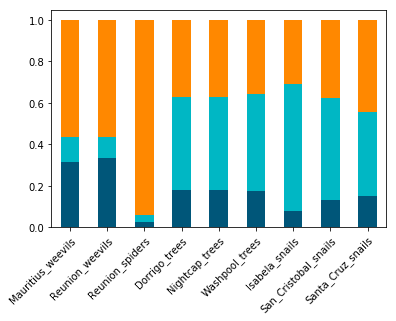

In [210]:
ax = cla_preds_df.plot.bar(stacked=True, legend=False, color=MESS.plotting.model_colors.values()[::-1])
_ = plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

## Get estimates and prediction intervals for all the synthetic communities

In [117]:
rgr_preds = OrderedDict()

for name in emp_df.index:
    print(name)
    try:
        rgr = MESS.inference.Ensemble.load(emp_df["regressors"][name])
        rgr_preds[name] = rgr.empirical_pred
    except IOError:
        print("Regressor does not exist: {}".format(name))

for name in rgr_preds:
    print(name)
    display(rgr_preds[name])

Mauritius_weevils
Reunion_weevils
Reunion_spiders
Dorrigo_trees
Nightcap_trees
Washpool_trees
Isabela_snails
San_Cristobal_snails
Santa_Cruz_snails
Mauritius_weevils


,alpha,ecological_strength,m,generation,speciation_prob,_lambda
estimate,7107.251038,0.390940,0.007028,1259.572400,0.002600,0.933514
lower 0.025,3496.731182,0.001662,0.002072,402.724946,0.000599,0.804230
upper 0.975,9831.388833,0.995216,0.009649,3590.324978,0.004940,1.000000


Reunion_weevils


,alpha,ecological_strength,m,generation,speciation_prob,_lambda
estimate,7178.213886,0.415004,0.007028,1259.572400,0.002689,0.929886
lower 0.025,3506.795296,0.001670,0.002072,402.724946,0.000588,0.802309
upper 0.975,9823.660937,0.996648,0.009649,3590.324978,0.004940,1.000000


Reunion_spiders


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,8346.363032,0.197306,5805.876065,0.003211,815.667319,0.000753,0.896258
lower 0.025,6170.016148,0.001180,2938.192790,0.001060,294.267739,0.000510,0.819465
upper 0.975,9951.414497,0.915339,8645.222566,0.008616,2011.484095,0.001400,0.997267


Dorrigo_trees


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,1843.200845,0.269251,5307.243628,0.00483,32.115745,0.002763,0.356260
lower 0.025,1037.193373,0.001410,1702.609487,0.00112,3.000000,0.000650,0.069642
upper 0.975,4269.322086,0.989078,9632.083874,0.00985,131.000000,0.004840,0.790822


Nightcap_trees


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,1856.091567,0.284104,5097.044324,0.004899,31.168872,0.002841,0.356111
lower 0.025,1040.403460,0.001390,1485.225300,0.001120,1.000000,0.000650,0.037267
upper 0.975,4304.951526,0.989113,9544.940943,0.009850,154.158799,0.004902,0.841351


Washpool_trees


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,1649.840864,0.305181,5157.279065,0.004854,28.351463,0.002984,0.345157
lower 0.025,1028.820759,0.001390,1700.741882,0.001120,1.000000,0.000650,0.047221
upper 0.975,3737.625969,0.989028,9543.028190,0.009850,125.000000,0.004910,0.838550


Isabela_snails


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,7646.313334,0.146689,4594.239830,0.003563,290.756264,0.001648,0.843186
lower 0.025,4740.010479,0.001320,1107.000000,0.001060,49.487164,0.000520,0.131490
upper 0.975,9927.188180,0.868715,9470.125566,0.009623,786.229741,0.004459,1.000000


San_Cristobal_snails


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,6454.485657,0.086715,3280.583508,0.002937,306.758593,0.001670,0.839953
lower 0.025,2154.501320,0.001215,1032.000000,0.001030,55.000000,0.000530,0.183529
upper 0.975,9724.003215,0.814637,8431.723037,0.009620,792.605063,0.004493,1.000000


Santa_Cruz_snails


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,7425.370573,0.080414,3131.104930,0.002905,301.213559,0.001529,0.839487
lower 0.025,4638.346866,0.001210,1032.000000,0.001030,55.755734,0.000520,0.271634
upper 0.975,9842.642954,0.721423,8416.996042,0.009620,791.159095,0.004141,0.999793


## Figure out how to do the gd plot

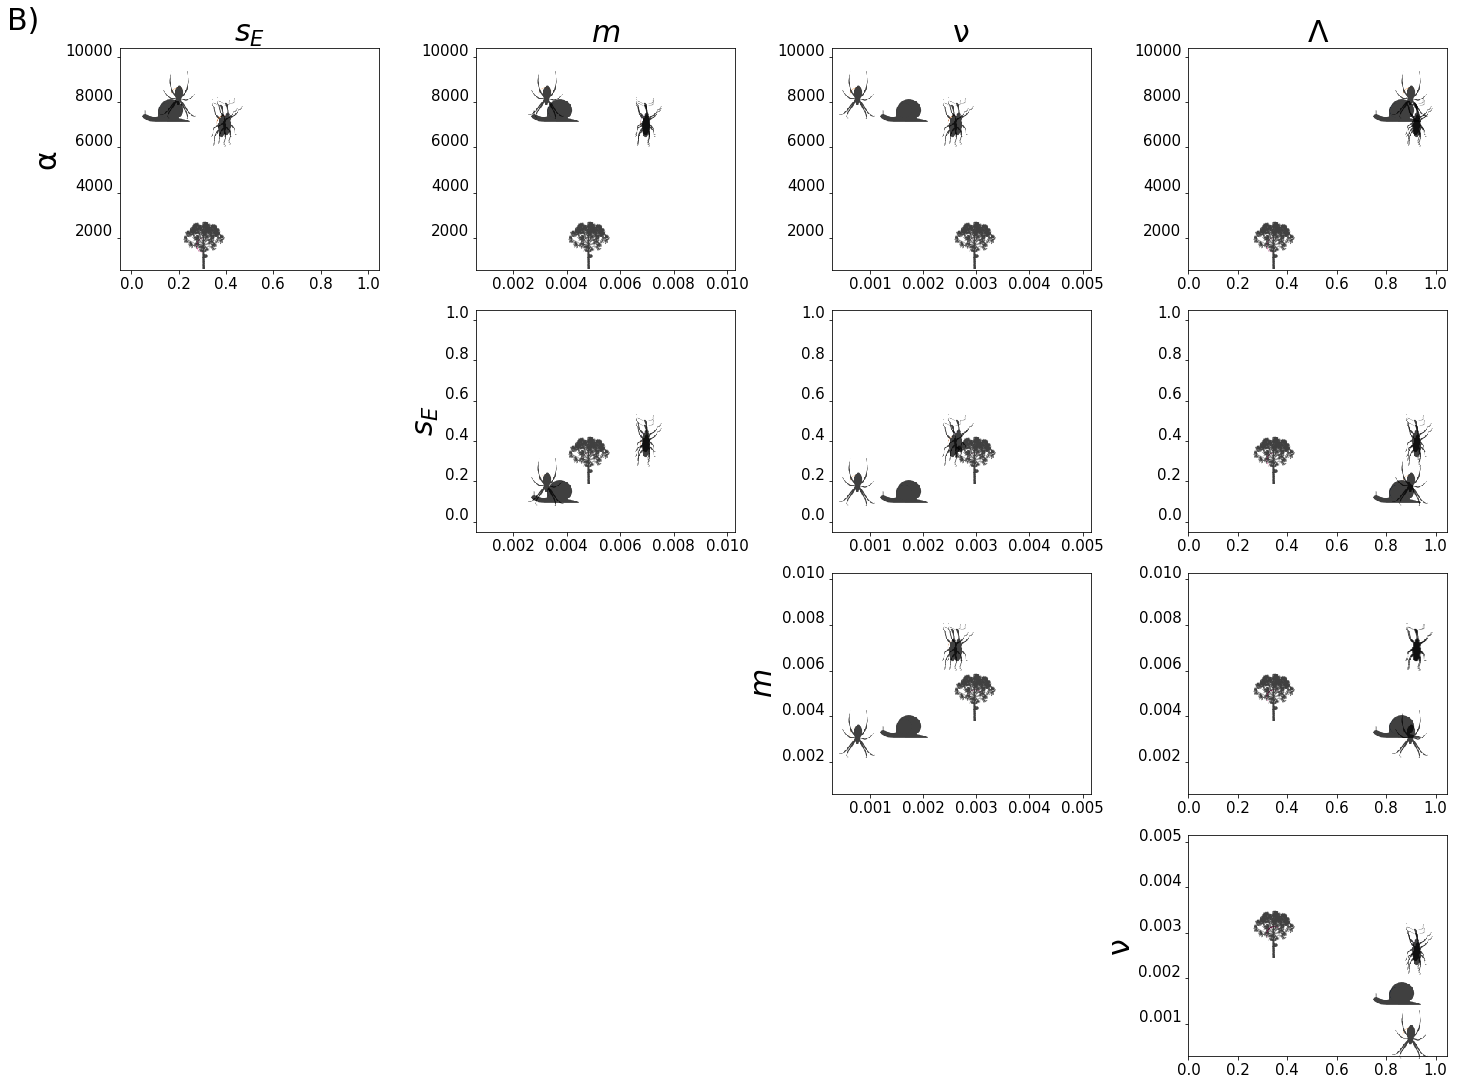

In [290]:
plot_bars = True
do_icons = True

title_size = 30
tick_label_size = 15

## Minus 1 because we don't do pairwise comparisons within parameters
## Real data
n_targets = len(rgr_preds[rgr_preds.keys()[0]].columns) - 1
targets = rgr.targets

## Probably used for the manu
targets = ["alpha", "ecological_strength", "m", "speciation_prob", "_lambda"]
n_targets = len(targets) - 1

## If you only want to plot a subset of the communities specify them here
communities_to_plot = ["Mauritius_weevils", "Reunion_weevils", "Reunion_spiders",\
                       "Washpool_trees", "Isabela_snails"]

## Small for testing
#n_targets=3
#targets = ["alpha", "ecological_strength", "J", "m"]

offset = 1
#colors = list(plt.get_cmap("tab10").colors[:len(rgr_preds)+1])
colors = list(plt.get_cmap("Accent").colors[:len(rgr_preds)+1])

## Swap out green for a rg-colorblind friendlier color
colors[3] = plt.get_cmap("Accent").colors[-3]
colors[0] = plt.get_cmap("Accent").colors[-2]


fig, axs = plt.subplots(n_targets, n_targets, figsize=(20, 15))#, sharey=True)
for ridx, t1 in enumerate(targets[:-1]):
    
    ## Hide the ticks, labels, and spines of the axes we aren't plotting to.
    ## There's probably a cleaner way to do this. We could use ax.axis('off'),
    ## but the problem is we want to retain the ylabel, so we have to shut off
    ## everything but the ylabel by hand.
    for cidx, _ in enumerate(targets[:ridx]):
        ##print("Hide axis: {} {}".format(ridx, cidx))
        axs[ridx][cidx].set_yticklabels([])
        axs[ridx][cidx].set_xticklabels([])
        axs[ridx][cidx].tick_params(top='off', bottom='off', left='off', right='off')
        axs[ridx][cidx].spines['right'].set_visible(False)
        axs[ridx][cidx].spines['top'].set_visible(False)
        axs[ridx][cidx].spines['bottom'].set_visible(False)
        axs[ridx][cidx].spines['left'].set_visible(False)

    for cidx, t2 in enumerate(targets[ridx+1:]):
        if ridx == 0:
            axs[ridx][cidx+ridx].set_title(u"{}".format(MESS.plotting.target_labels[t2]), fontsize=title_size)

        if cidx == 0:
            axs[ridx][cidx+ridx].set_ylabel(u"{}".format(MESS.plotting.target_labels[t1]), fontsize=title_size)

        ## Error bars are not absolute values they are +/- wrt to the xy coord
        x = np.array([rgr_preds[v][t2]["estimate"] for v in communities_to_plot])
        y = np.array([rgr_preds[v][t1]["estimate"] for v in communities_to_plot])

        if plot_bars:
            x_low = x - np.array([rgr_preds[v][t2]["lower 0.025"] for v in communities_to_plot])
            x_high = np.array([rgr_preds[v][t2]["upper 0.975"] for v in communities_to_plot]) - x
            y_low = y - np.array([rgr_preds[v][t1]["lower 0.025"] for v in communities_to_plot])
            y_high = np.array([rgr_preds[v][t1]["upper 0.975"] for v in communities_to_plot]) - y
            axs[ridx][cidx+ridx].errorbar(x, y, yerr=[y_low, y_high], xerr=[x_low, x_high], color='black',\
                                          ecolor=colors, fmt='.', linewidth=3, alpha=0)

        axs[ridx][cidx+ridx].scatter(x, y, color=colors, marker='o', s=175, alpha=0.8)

        ## Make tick labels easier to read
        _ = plt.setp(axs[ridx][cidx+ridx].get_xticklabels(),#, rotation=45, ha="right",
            rotation_mode="anchor", fontsize=tick_label_size)
        _ = plt.setp(axs[ridx][cidx+ridx].get_yticklabels(),#, rotation=45, ha="right",
            rotation_mode="anchor", fontsize=tick_label_size)


        if do_icons:
            def getImage(path):
                ## Set the images alpha and make them a hair smaller
                return OffsetImage(plt.imread(path), alpha=0.75, zoom=0.75)

            paths = [
                'Figure6-Icons/Weevil.png',
                'Figure6-Icons/Weevil.png',
                'Figure6-Icons/Spider.png',
                'Figure6-Icons/Tree.png',
                'Figure6-Icons/Snail.png']

            for x0, y0, path in zip(x, y, paths):
                ## Blank the point that's there already
                axs[ridx][cidx+ridx].scatter(x, y, color='#FFFFFF', marker='o', s=175)
                img = getImage(path)
                ab = AnnotationBbox(img, (x0, y0), frameon=False)
                axs[ridx][cidx+ridx].add_artist(ab)

    if not do_icons:
        ## Use this one if you don't specify focal communities and just want to plot all
        #patches = [mpatches.Patch(color=colors[x], label=rgr_preds.keys()[x]) for x in range(len(rgr_preds))]

        ## Use this one if you specify focal communities
        patches = [mpatches.Patch(color=colors[x], label=communities_to_plot[x]) for x in range(len(communities_to_plot))]
        axs[-1][0].legend(handles=patches, loc='lower left', prop={'size': 20})

plt.tight_layout()
_ = fig.text(-0.01, 0.98, "B)", fontsize=30, rotation=0)

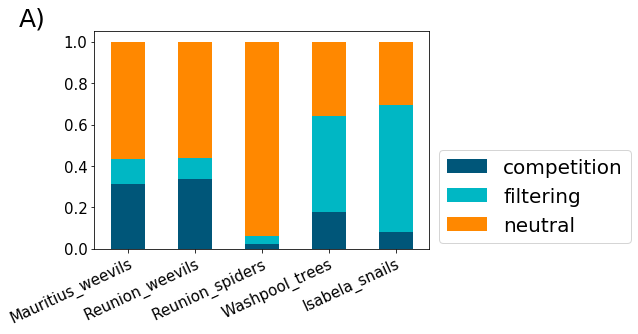

In [277]:
ax = cla_preds_df.loc[communities_to_plot].plot.bar(stacked=True, legend=False,\
                                                    color=MESS.plotting.model_colors.values()[::-1])
_ = plt.setp(ax.get_xticklabels(), rotation=25, ha="right",
            rotation_mode="anchor", fontsize=15)
_ = plt.setp(ax.get_yticklabels(), fontsize=15)
plt.legend(bbox_to_anchor=(1, 0.5), fontsize=20)
_ = plt.gcf().text(-0.05, .9, "A)", fontsize=25, rotation=0)

## Trash below here

In [189]:
print(communities_to_plot)
#rgr_preds['Reunion_spiders']
#print([rgr_preds[x].loc['estimate'] for x in communities_to_plot])
pd.concat([rgr_preds[x].loc['estimate'] for x in communities_to_plot], axis=1).T.drop("J", axis=1)

['Mauritius_weevils', 'Reunion_weevils', 'Reunion_spiders', 'Washpool_trees', 'San_Cristobal_snails']


/home/iovercast/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,_lambda,alpha,ecological_strength,generation,m,speciation_prob
estimate,0.933514,7107.251038,0.390940,1259.572400,0.007028,0.002600
estimate,0.929886,7178.213886,0.415004,1259.572400,0.007028,0.002689
estimate,0.896258,8346.363032,0.197306,815.667319,0.003211,0.000753
estimate,0.345157,1649.840864,0.305181,28.351463,0.004854,0.002984
estimate,0.839953,6454.485657,0.086715,306.758593,0.002937,0.001670


Text(0.5,1,'$\\sigma^2_M$')

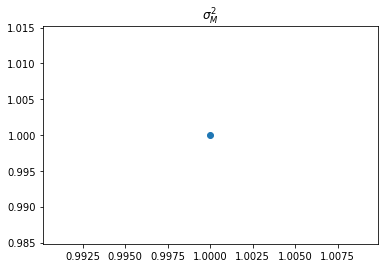

In [295]:
plt.scatter([1], [1])
plt.title(r"$\sigma^2_M$")